# Telescopes - PCA Project

## Import Packages

In [3]:
import warnings  # Supress warnings

warnings.filterwarnings("ignore")
import os  # Interact with the operating system.
import sys  # Read system parameters.
from io import StringIO  # Read and write strings as files
from urllib.parse import urlparse  # Parse URL and extract path component

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests  # Send HTTP requests
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

print("Libraries used in this project:")
print("- Python {}".format(sys.version))
print("- NumPy {}".format(np.__version__))
print("- pandas {}".format(pd.__version__))
print("- Matplotlib {}".format(mpl.__version__))
print("- Seaborn {}".format(sns.__version__))
print("- scikit-learn {}\n".format(sklearn.__version__))

Libraries used in this project:
- Python 3.9.20 (main, Oct  3 2024, 02:27:54) 
[Clang 14.0.6 ]
- NumPy 1.22.3
- pandas 1.4.1
- Matplotlib 3.8.4
- Seaborn 0.13.0
- scikit-learn 1.2.2



## Load the Dataset

In [4]:
"""Capture URL"""

url = "https://raw.githubusercontent.com/tyrantdavis/datasets/refs/heads/main/telescope.csv"

"""Get the request object"""
request = requests.get(url).text

"""Save as data frame and copy"""
telescopes = pd.read_csv(StringIO(request))
df = telescopes.copy()

"""Parse the URL"""
parsed_url = urlparse(url)
path = parsed_url.path
filename = os.path.basename(path)


print(f"Loaded {len(df)} telescope records from {filename}.")

Loaded 19020 telescope records from telescope.csv.


### Task 1: Drop nan values.

#### Drop null and nan values

In [5]:
df.dropna()

,pindex,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pindex    19020 non-null  int64  
 1   fLength   19020 non-null  float64
 2   fWidth    19020 non-null  float64
 3   fSize     19020 non-null  float64
 4   fConc     19020 non-null  float64
 5   fConc1    19020 non-null  float64
 6   fAsym     19020 non-null  float64
 7   fM3Long   19020 non-null  float64
 8   fM3Trans  19020 non-null  float64
 9   fAlpha    19020 non-null  float64
 10  fDist     19020 non-null  float64
 11  class     19020 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB


**Spotlights** 

Attribute information:

1. pindex pseudo index
2. fLength: continuous -- major axis of ellipse [mm]
3. fWidth: continuous -- minor axis of ellipse [mm]
4. fSize: continuous -- 10-log of sum of content of all pixels [in #phot]
5. fConc: continuous -- ratio of sum of two highest pixels over fSize [ratio]
6. fConc1: continuous -- ratio of highest pixel over fSize [ratio]
7. fAsym: continuous -- distance from highest pixel to center, projected onto major axis [mm]
8. fM3Long: continuous -- 3rd root of third moment along major axis [mm]
9. fM3Trans: continuous -- 3rd root of third moment along minor axis [mm]
10. fAlpha: continuous -- angle of major axis with vector to origin [deg]
11. fDist: continuous -- distance from origin to center of ellipse [mm]


- The training set includes **19020 rows** and **12 columns**.
- 11 columns contain float values, **1** column contains integer values,  and **1** column contains object values.
- There is **no missing data** as all rows have values for every column.
  

### Drop Unused Column

The pseudo index column does not offer any valuable insights for the project's goals, so it will be eliminated.

In [7]:
df.drop(columns=["pindex"], inplace=True)

#### Example data samples

In [8]:
print("Task 1:")
df.head()

Task 1:


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


g    12332
h     6688
Name: class, dtype: int64


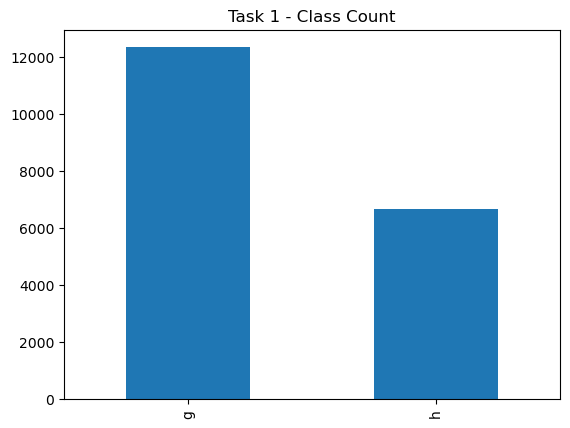

In [9]:
multiclass = df["class"].value_counts()
multiclass.plot(kind="bar", title="Task 1 - Class Count", grid=False)
print(multiclass)

**Spotlights** 

The class feature is comprised of multiple classes: 

- Class **g** -- gamma(signal) total : 12332
- Class **h** -- hadrons(background) total : 6688

In [10]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


### Task 2: Extract class column.

#### Extract the class classes

In [9]:
"""Extract the numerical columns onto a variable named data_matrix and the classes to a variable named 
classes"""

classes = df["class"]

"""Create dataframe of NUMERIC features"""
data_matrix = df.drop(columns="class")
print("Task 2:\n")
# print(data_matrix)
with pd.option_context("float_format", "{:.2f}".format):
    print(data_matrix)

Task 2:

       fLength  fWidth  fSize  fConc  fConc1   fAsym  fM3Long  fM3Trans  \
0        28.80   16.00   2.64   0.39    0.20   27.70    22.01     -8.20   
1        31.60   11.72   2.52   0.53    0.38   26.27    23.82     -9.96   
2       162.05  136.03   4.06   0.04    0.02  116.74   -64.86    -45.22   
3        23.82    9.57   2.34   0.61    0.39   27.21    -6.46     -7.15   
4        75.14   30.92   3.16   0.32    0.18   -5.53    28.55     21.84   
...        ...     ...    ...    ...     ...     ...      ...       ...   
19015    21.38   10.92   2.62   0.59    0.39   15.26    11.52      2.88   
19016    28.95    6.70   2.27   0.54    0.28   37.08    13.19     -2.96   
19017    75.45   47.53   3.45   0.14    0.05   -9.36    41.06     -9.47   
19018   120.51   76.90   3.99   0.09    0.07    5.80   -93.52    -63.84   
19019   187.18   53.00   3.21   0.29    0.15 -167.31  -168.46     31.48   

       fAlpha  fDist  
0       40.09  81.88  
1        6.36 205.26  
2       76.96 256.79 

### Task 3: Create a correlation matrix of the numeric features..

In [10]:
"""Use the `.corr()` method on `data_matrix` to get the correlation matrix"""

correlation_matrix = data_matrix.corr()
print(correlation_matrix)

           fLength    fWidth     fSize     fConc    fConc1     fAsym  \
fLength   1.000000  0.770512  0.702454 -0.630999 -0.598145 -0.368556   
fWidth    0.770512  1.000000  0.717517 -0.609779 -0.581141 -0.266961   
fSize     0.702454  0.717517  1.000000 -0.850850 -0.808835 -0.159863   
fConc    -0.630999 -0.609779 -0.850850  1.000000  0.976412  0.112272   
fConc1   -0.598145 -0.581141 -0.808835  0.976412  1.000000  0.100159   
fAsym    -0.368556 -0.266961 -0.159863  0.112272  0.100159  1.000000   
fM3Long  -0.119747 -0.176234  0.095157 -0.121899 -0.118769  0.274045   
fM3Trans  0.013389  0.039744  0.015455 -0.011294 -0.010966  0.002553   
fAlpha   -0.008777  0.066061 -0.186675  0.235272  0.229799 -0.055689   
fDist     0.418466  0.336816  0.437041 -0.328332 -0.304625 -0.206730   

           fM3Long  fM3Trans    fAlpha     fDist  
fLength  -0.119747  0.013389 -0.008777  0.418466  
fWidth   -0.176234  0.039744  0.066061  0.336816  
fSize     0.095157  0.015455 -0.186675  0.437041  
fCo

**Plot Heatmap of the correlation matrix**

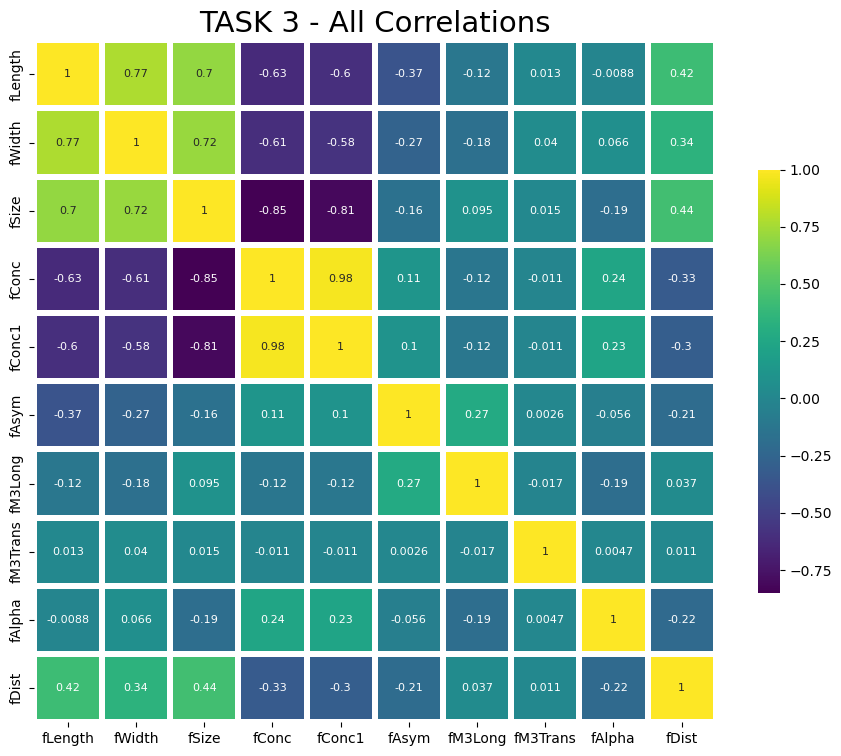

In [11]:
# Specify size and title for visualization
f, axes = plt.subplots(figsize=(11, 11))
plt.title("TASK 3 - All Correlations", fontsize=21)

# Use Seaborn to plot the correlation matrix as a hetamap
sns.heatmap(
    correlation_matrix,
    linewidths=3.0,
    square=True,
    cmap="viridis",
    linecolor="w",
    annot=True,
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.5},
)
plt.show()

**Spotlights** 

- fsize and fwidth are highlt correlated with **flength** exhibiting multicolinearity. This wiill be addressed during the performance of the PCA to get a filtered set of features.

### Encode 'g' and 'h' classes.

Encoding the class feature ensures that the data meets the requirements for the Pearson's Correlation Coefficient method, allowing for a meaningful examination of the relationships between variables.

In [12]:
df["class"] = df["class"].replace({"g": 0, "h": 1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


In [12]:
print("'class' feature encoded as an integer.")

'class' feature encoded into an integer.


**Re-Encode 'g' and 'h' classes.**

In [13]:
print(df.corr()["class"].sort_values(ascending=False))

class       1.000000
fAlpha      0.460979
fLength     0.307572
fWidth      0.265596
fSize       0.117795
fDist       0.065203
fM3Trans    0.003837
fConc1     -0.004797
fConc      -0.024615
fAsym      -0.173587
fM3Long    -0.193409
Name: class, dtype: float64


In [14]:
df["class"] = df["class"].replace({0: "g", 1: "h"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [13]:
print("'class' feature re-encoded back into an object.")

'class' feature re-encoded into an object.


### Task 4: Perform eigendecomposition.

The net step utilizes the NumPy function np.linalg.eig to determine the eigenvectors and eigenvalues. This process, also arranges the eigenvalues in descending order by first sorting their indices, and then applying these indices to reorder the eigenvalues accordingly.

In Principal Component Analysis (PCA), an **eigenvector** is a unit vector derived from the transformation matrix, characterized by a length of one. This vector indicates the direction of the principal component, helping to identify the most significant features in the data. 

The **eigenvalue**, on the other hand, serves as a coefficient for the eigenvector, quantifying the amount of variance associated with each principal component. Essentially, it determines the significance of each eigenvector in terms of how well it explains the variability within the dataset. A higher eigenvalue signifies a greater importance of the corresponding eigenvector in capturing the data's variance. An eigenvalue can be viewed as a collection of values, with each value representing the variance linked to its respective principal component. This relationship between eigenvalues and eigenvectors is crucial for understanding the structure of the data and for effectively reducing its dimensionality.


In [15]:
print("Task 4:")
"""Perform eigendecomposition using `np.linalg.eig"""
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(
    f"Eigenvalues length: {eigenvalues.size}, Original Number of Features: {data_matrix.shape[1]}"
)

"""Order the eigenvalues by ordering the indices of the eigenvalues using `argsort`, and use [::-1] to 
order them from greatest to smallest"""
indices = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]

print(eigenvalues.shape, eigenvectors.shape)

Task 4:
Eigenvalues length: 10, Original Number of Features: 10
(10,) (10, 10)


### Task 5: Find the variance/information percentages for each eigenvalue.

To determine the contribution of each eigenvalue, calculate their proportions relative to the overall sum of all eigenvalues. These proportions indicate the percentage of information that each eigenvector linked to the eigenvalues holds.

In [16]:
"""Find the percentages of information for each eigenvector, which is generated by the proportion of
its eigenvalues to the sum of all eigenvalues"""

information_proportions = eigenvalues / eigenvalues.sum()
information_percents = information_proportions * 100

**Plot the principal axes vs the information proportions**

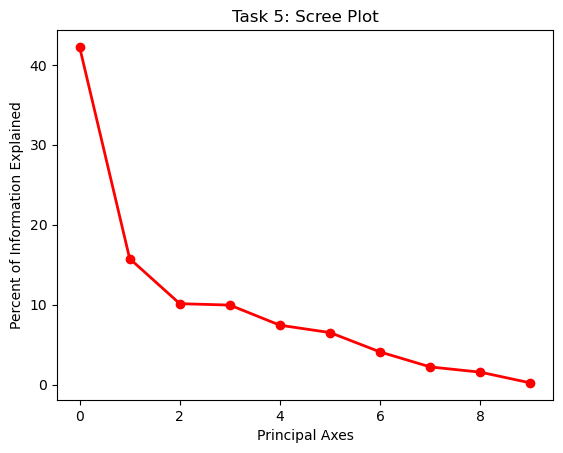

In [17]:
"""Plot the principal axes vs the information proportions for each principal axis"""

plt.figure()
plt.plot(information_percents, "ro-", linewidth=2)
plt.title("Task 5: Scree Plot")
plt.xlabel("Principal Axes")
plt.ylabel("Percent of Information Explained")
plt.show()